In [1]:
# import data
import numpy as np
from numpy import linalg as LA
from functions import ClusterMerits, AuxiliarFunctions
from sklearn import preprocessing

data_path = '/home/micael/MyWorkspace/DATA'
signal = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:5000,:]
signal_part = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:250,:]
signal_trgt = np.ones(signal.shape[0])

ttbar = np.load(data_path+'/'+'TTbarMatrix.npy')
ttbar_part = np.load(data_path+'/'+'TTbarMatrix.npy')[0:250,:]
bkg = ttbar
bkg_trgt = np.zeros(bkg.shape[0])

data = np.append(signal,bkg,axis=0)
data_part = np.append(signal_part,ttbar_part,axis=0)
trgt = np.append(signal_trgt,bkg_trgt,axis=0)
data_part.shape



(500, 24)

In [59]:
np.random.shuffle(data_part)

data_part

array([[  2.71048676e-02,   1.44329727e-01,   8.17325786e-02, ...,
         -1.99281728e+00,   4.19478008e+01,   4.19082091e+01],
       [  1.11494157e-02,   4.73981015e-02,   1.01009235e-01, ...,
         -2.96466231e+00,   5.01543047e+01,   3.50726827e+01],
       [  4.89451997e-02,   3.12652946e-01,   6.33189529e-02, ...,
          1.52652109e+00,   8.60162891e+01,   5.23505551e+01],
       ..., 
       [  1.22512914e-02,   3.56857170e-04,   4.16896120e-03, ...,
          2.94199419e+00,   6.45858945e+01,   5.49483232e+01],
       [  1.24684805e-02,   1.82390886e-05,   2.30307342e-03, ...,
         -1.77072442e+00,   4.30140273e+01,   3.43886890e+01],
       [  5.32847382e-02,   2.15619877e-01,   5.33573553e-02, ...,
         -1.94102156e+00,   6.30252773e+01,   3.23278429e+01]])

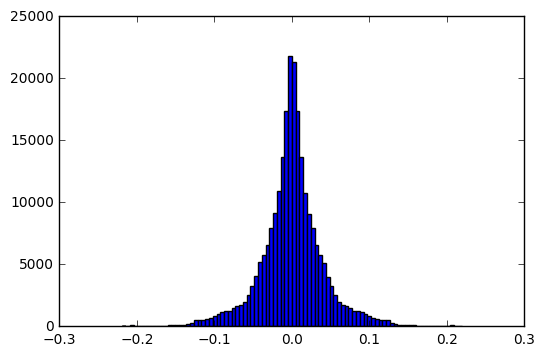

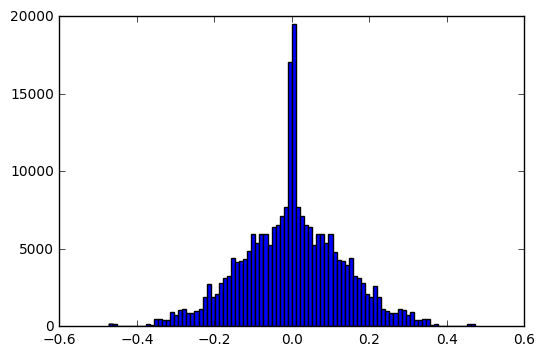

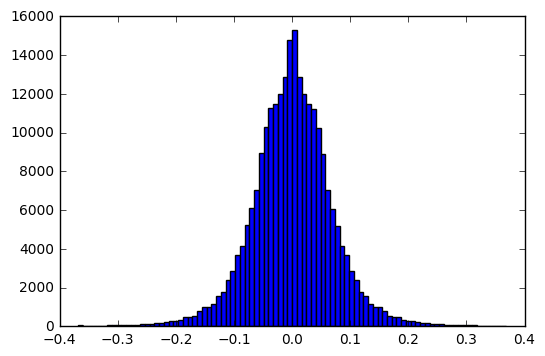

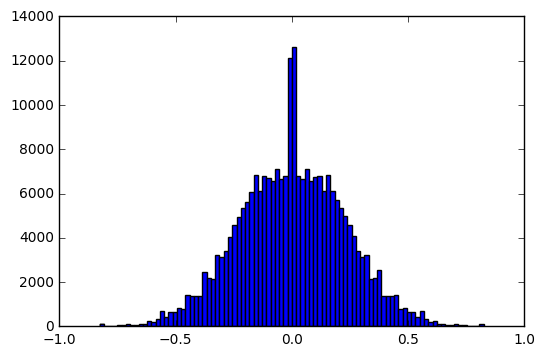

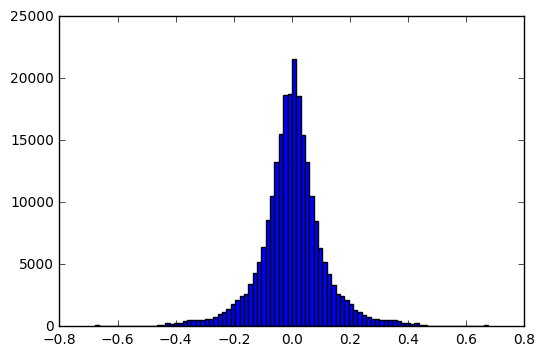

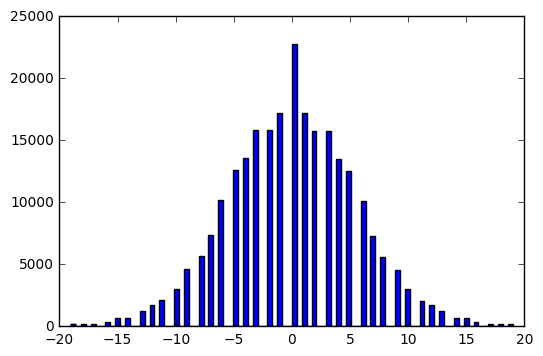

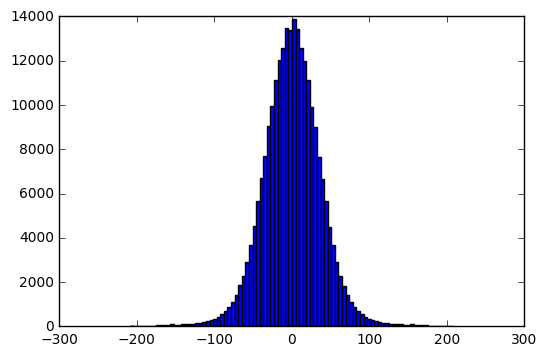

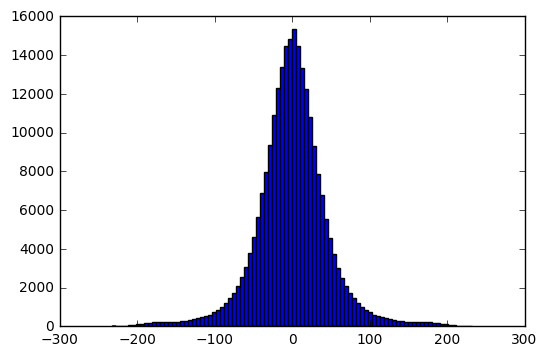

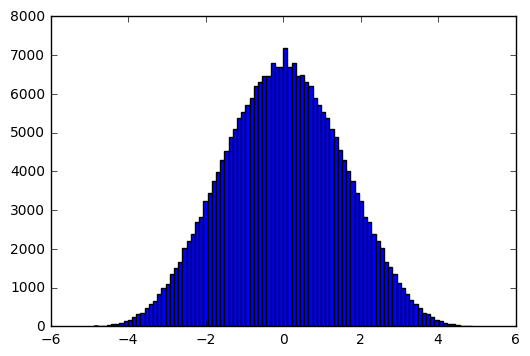

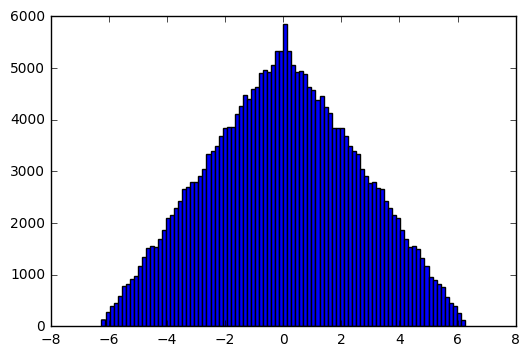

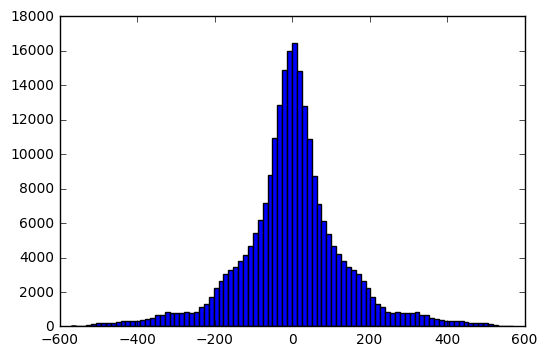

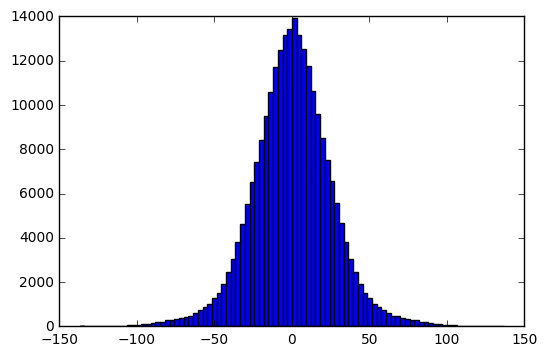

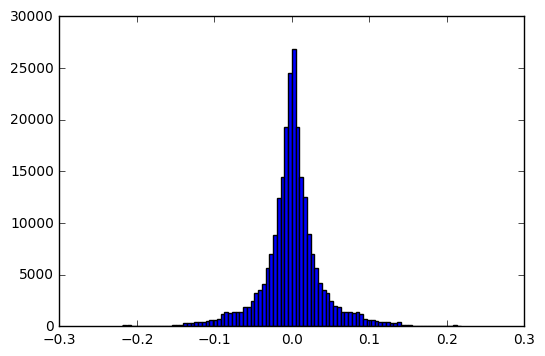

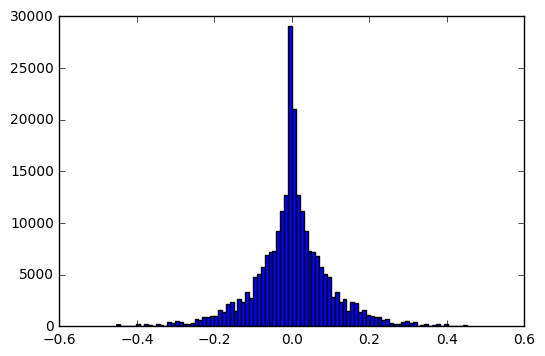

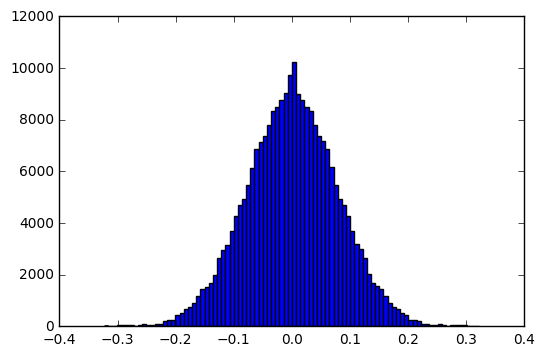

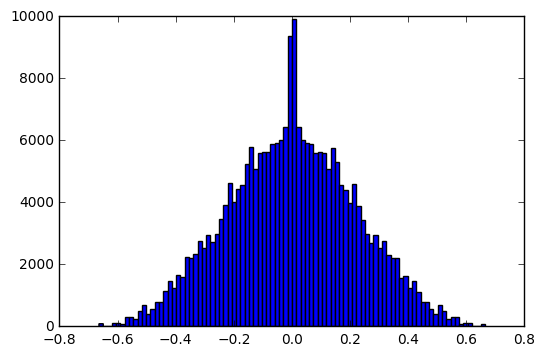

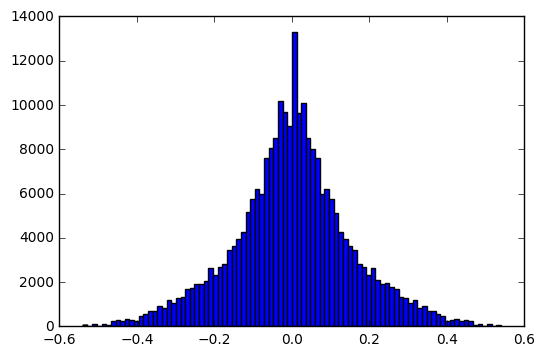

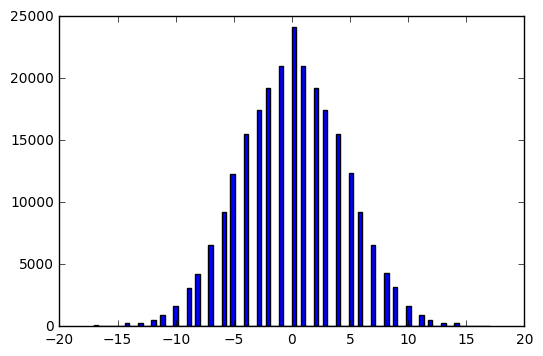

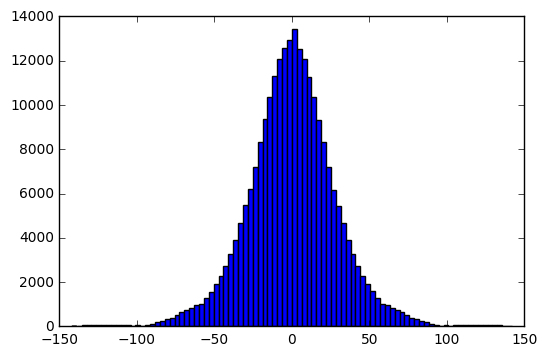

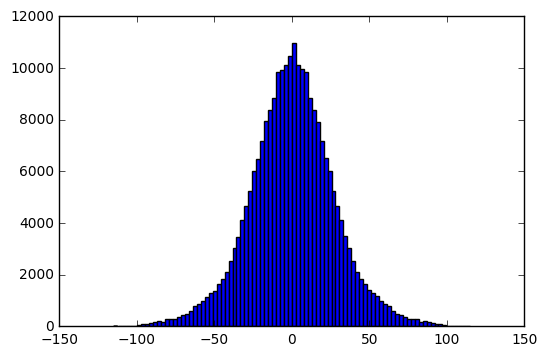

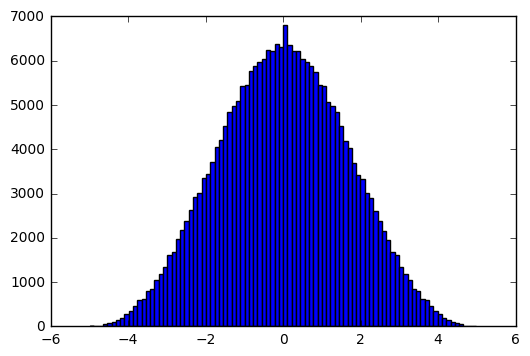

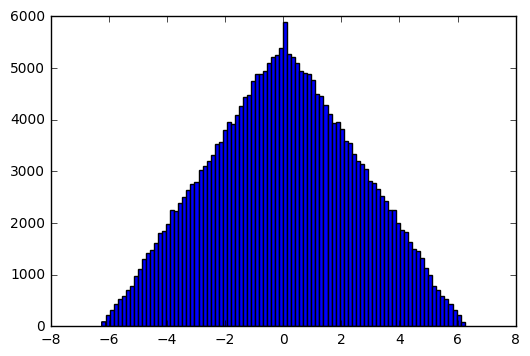

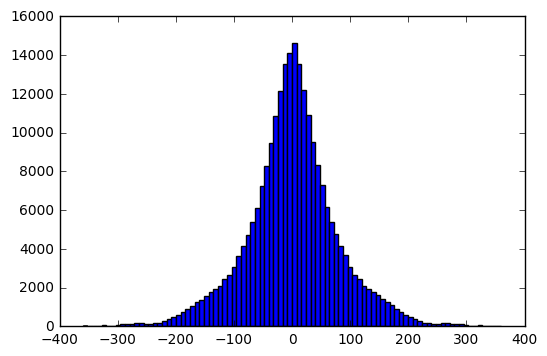

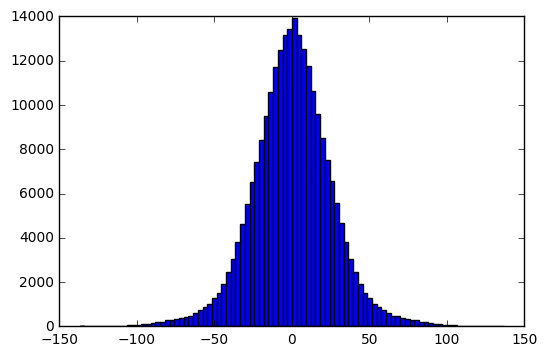

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

for k in range(data_part.shape[1]):
    
    for i in range(data_part.shape[0]-1):
        for j in range(data_part.shape[0]):
            dist0 = data_part[i,k]-data_part[j,k]
            #dist1 = abs(data[i,k]-data[j,k])
            dataBuffer0 = np.array([dist0])
            #dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
            #    data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
            #    data1 = np.append(data1,dataBuffer1, axis=0)
            
    #plt.subplot(211)
    plt.hist(data0,bins=90)
    #plt.subplot(212)
    #plt.hist(data1,bins=60)
    plt.show()

In [2]:
signal_center = ClusterMerits.Baricenter(data[trgt==1,:])
bkg_center = ClusterMerits.Baricenter(data[trgt==0,:])

np.min(signal_center),np.min(bkg_center)

list_cluster = [signal,bkg]
F_0 = ClusterMerits.DispTotal(data,ClusterMerits.Baricenter(data),media='')
F_o = ClusterMerits.DispInterClass(list_cluster,data)
F_i = ClusterMerits.DispIntraClass(list_cluster)

F_o + F_i , F_0

(203658708.10461092, 203658708.10461017)

In [3]:
# normalization CRITICAL
norm_signal = preprocessing.scale(signal)
norm_bkg = preprocessing.scale(bkg)
scl_data = np.append(norm_signal,norm_bkg,axis=0)

list_c = [norm_signal,norm_bkg]
f_0 = ClusterMerits.DispTotal(scl_data,ClusterMerits.Baricenter(scl_data),media='')
f_o = ClusterMerits.DispInterClass(list_c,scl_data)
f_i = ClusterMerits.DispIntraClass(list_c)

f_o + f_i , f_0


(239999.99999999921, 240000.00000000073)

In [2]:
# data set for testing
from sklearn.datasets.samples_generator import make_blobs

n_samples=200
n_features=2
centers=[[-1,-1],[1,1]] 
cluster_std=1.0

X, y = make_blobs(n_samples, n_features, centers, cluster_std,
                  random_state=None)
#print range(np.max(y)+1)
#X,y

In [3]:
C_1 = ClusterMerits.Baricenter(X[y==0,:])
C_2 = ClusterMerits.Baricenter(X[y==1,:])
#C_3 = ClusterMerits.Baricenter(X[y==2,:])
#C_4 = ClusterMerits.Baricenter(X[y==3,:])

print C_1,C_2
dataSetCenters = np.zeros([len(centers),2])
#print dataSetCenters
for i in range(2):
    dataSetCenters[i,:] = ClusterMerits.Baricenter(X[y==i,:])
dataSetCenters

[-1.10315447 -0.89902292] [ 1.06790257  1.12840472]


array([[-1.10315447, -0.89902292],
       [ 1.06790257,  1.12840472]])

In [6]:
sinapses = np.array([[-3.342,  -2.433 ],[3.465,  2.456]])
sinapses

array([[-3.342, -2.433],
       [ 3.465,  2.456]])

In [95]:
for ievnt in range(X.shape[0]):
    if y[ievnt]==0:
        #print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
        #print 'c1'
        #print 'sinapse 1 antes', sinapses[0,:]
        sinapses[0,:] = (sinapses[0,:] + 0.1*(X[ievnt,:]-sinapses[0,:]))
        #print 'sinapse 1 depois', sinapses[0,:]
        #print 'real', dataSetCenters[0,:]
        #print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
    else:
        sinapses[1,:] = (sinapses[1,:] + 0.1*(X[ievnt,:]-sinapses[1,:]))

sinapses

array([[-0.93663129, -0.95451378],
       [ 1.16666564,  1.35955237]])

In [7]:
# treinamento correto
for ievent in range(X.shape[0]):
    print '----------------------------------------'
    print sinapses[y[ievent],:]
    sinapses[y[ievent],:] = sinapses[y[ievent],:] + 0.1*(X[ievent,:]-sinapses[y[ievent],:])
    print sinapses[y[ievent],:]
    print '----------------------------------------'
sinapses

----------------------------------------
[-3.342 -2.433]
[-3.06403441 -2.17633215]
----------------------------------------
----------------------------------------
[-3.06403441 -2.17633215]
[-2.96273911 -1.93208133]
----------------------------------------
----------------------------------------
[ 3.465  2.456]
[ 3.09514425  2.3583854 ]
----------------------------------------
----------------------------------------
[ 3.09514425  2.3583854 ]
[ 2.91276404  2.12118475]
----------------------------------------
----------------------------------------
[-2.96273911 -1.93208133]
[-2.82909229 -1.78871585]
----------------------------------------
----------------------------------------
[-2.82909229 -1.78871585]
[-2.68899531 -1.81551608]
----------------------------------------
----------------------------------------
[ 2.91276404  2.12118475]
[ 2.84465038  2.36107475]
----------------------------------------
----------------------------------------
[ 2.84465038  2.36107475]
[ 2.69207847  2

array([[-0.88242018, -1.06654639],
       [ 0.88009633,  1.00255283]])

In [112]:
def update_sinapses(sinapse_id,event,train_parameter):
    sinapses[sinapse_id,:] = (sinapses[sinapse_id,:]+train_parameter*(event-sinapses[sinapse_id,:]))
    

for ievent in range(X.shape[0]):
    update_sinapses(y[ievent],X[ievent,:],0.1)
    
sinapses

array([[-1.39471181, -1.0902051 ],
       [ 1.00845987,  1.14600684]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2feb102390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2feaf83d10>]], dtype=object)

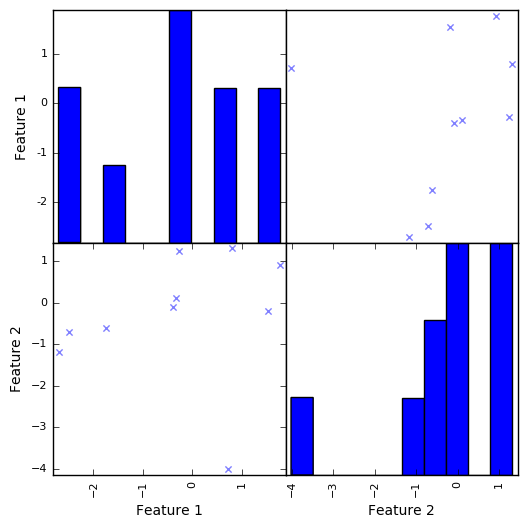

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix

df = pandas.DataFrame(X, columns=['Feature 1', 'Feature 2'])
scatter_matrix(df,marker='x', figsize=(6, 6))

In [4]:
from functions import SupervisedKohonen

trn_params = SupervisedKohonen.TrainParameters()

trn_params.learning_rate = 0.1

knn = SupervisedKohonen.KohonenNN()



In [5]:
knn.fit(X,y,trn_params=trn_params)

Supervised Kohonen NN TrainParameters
Learning Rate: 0.10000
Verbose: False
Number of events: 200


array([[ 0.2077436 ,  0.30934759],
       [-0.19882099,  0.12626193]])